In [1]:
%config IPCompleter.use_jedi=False
%matplotlib inline

import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fmnist=keras.datasets.fashion_mnist


In [3]:
(x_train, y_train), (x_test, y_test)=fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [112]:
x_train[0]/255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [95]:
y_train

45

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [106]:
model=keras.models.Sequential()

In [107]:
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(10))


In [108]:
model.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [109]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [110]:
history=model.fit(x_train,y_train,batch_size=20,epochs=50,validation_split=0.2)

Epoch 1/50
2400/2400 [==============================] - 7s 3ms/step - loss: 2.7394 - accuracy: 0.7392 - val_loss: 0.7097 - val_accuracy: 0.8030
Epoch 2/50
2400/2400 [==============================] - 6s 3ms/step - loss: 0.6671 - accuracy: 0.7835 - val_loss: 0.6105 - val_accuracy: 0.7952
Epoch 3/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.5824 - accuracy: 0.8019 - val_loss: 0.4781 - val_accuracy: 0.8342
Epoch 4/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.5101 - accuracy: 0.8199 - val_loss: 0.5067 - val_accuracy: 0.8263
Epoch 5/50
2400/2400 [==============================] - 8s 3ms/step - loss: 0.4785 - accuracy: 0.8325 - val_loss: 0.5559 - val_accuracy: 0.8117
Epoch 6/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4453 - accuracy: 0.8416 - val_loss: 0.4365 - val_accuracy: 0.8464
Epoch 7/50
2400/2400 [==============================] - 7s 3ms/step - loss: 0.4288 - accuracy: 0.8483 - val_loss: 0.4687 - val_accuracy:

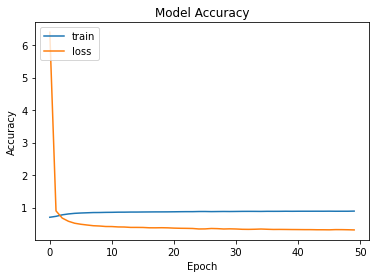

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()